In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import csv

# plt.figure(figsize=(20,15))
pd.set_option('display.max_columns', 500)

In [2]:
train = pd.read_csv('sparse_train_df.csv')
train=train.iloc[:-1,:]
train

,artistName,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,albumName,A,B,C,AnB,AnC,BnC,AnBnC,Labels
0,Erik Satie,Uspud Act I (Version for Piano): No. 22 —,0.651,0.00447,7,-29.930,0,0.5950,0.99400,0.98400,0.0846,0.0000,140.311,24853.0,3,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0,B
1,Erik Satie,Uspud Act III (Version for Piano): No. 51 Il s...,0.402,0.00215,6,-27.476,0,0.1110,0.99400,0.91300,0.0923,0.0000,166.699,29893.0,3,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0,B
2,Raining Jane,Prelude,0.280,0.11500,0,-37.846,0,0.0339,0.54900,0.44400,0.0962,0.0309,67.349,30200.0,4,WE,0,0,1.0,0.0,0,0.0,0,C
3,Erik Satie,Uspud Act III (Version for Piano): No. 42 Quan...,0.637,0.07340,2,-14.896,1,0.3200,0.96500,0.77900,0.0845,0.0000,72.226,30893.0,5,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0,B
4,Citizen,Sleep,0.579,0.90300,1,-10.570,1,0.1100,0.00191,0.00687,0.1340,0.8920,146.990,31905.0,4,Mystery Sounds,0,0,1.0,0.0,0,0.0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12980,Scary Pockets,2am Funk Dance Party,0.759,0.83700,2,-9.114,1,0.0425,0.46700,0.91900,0.1030,0.7830,103.981,1140000.0,4,2am Funk Dance Party,0,1,0.0,0.0,0,0.0,0,B
12981,Haken,Crystallised,0.458,0.82000,9,-6.663,1,0.0479,0.00207,0.04580,0.1020,0.4570,178.006,1162290.0,4,Restoration EP,0,0,1.0,0.0,0,0.0,0,C
12982,Damien Rice,Sleep Don't Weep,0.223,0.00110,7,-32.779,0,0.0548,0.92000,0.55300,0.0959,0.0222,135.295,1314493.0,5,9,0,0,1.0,0.0,0,0.0,0,C
12983,Billy Strayhorn,What is Jazz - Part One (Types of Jazz),0.616,0.20900,7,-16.566,1,0.9020,0.96600,0.00000,0.1270,0.3460,76.418,1415707.0,4,What is Jazz,1,0,0.0,0.0,0,0.0,0,A


In [180]:
train_dfC=train.copy()
train_dfA=train.copy()
train_dfB=train.copy()

In [182]:
temp_list=[]
for i in range(train_dfA.shape[0]):
    if train_dfC.loc[i,"AnC"]==1:
        temp_list.append(1)
    elif train_dfC.loc[i,"AnB"]==1:
        temp_list.append(1)
    elif train_dfC.loc[i,"AnBnC"]==1:
        temp_list.append(1)
    elif train_dfC.loc[i,"A"]==1:
        temp_list.append(1)
    else:
        temp_list.append(0)

In [183]:
train_dfA['A or not']=temp_list

In [184]:
temp_list=[]
for i in range(train_dfB.shape[0]):
    if train_dfC.loc[i,"AnB"]==1:
        temp_list.append(1)
    elif train_dfC.loc[i,"BnC"]==1:
        temp_list.append(1)
    elif train_dfC.loc[i,"AnBnC"]==1:
        temp_list.append(1)
    elif train_dfC.loc[i,"B"]==1:
        temp_list.append(1)
    else:
        temp_list.append(0)
train_dfB['B or not']=temp_list

In [185]:
temp_list=[]
for i in range(train_dfC.shape[0]):
    if train_dfC.loc[i,"AnC"]==1:
        temp_list.append(1)
    elif train_dfC.loc[i,"BnC"]==1:
        temp_list.append(1)
    elif train_dfC.loc[i,"AnBnC"]==1:
        temp_list.append(1)
    elif train_dfC.loc[i,"C"]==1:
        temp_list.append(1)
    else:
        temp_list.append(0)
        
train_dfC['C or not']=temp_list

In [186]:
train_dfC.head()

,artistName,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,albumName,A,B,C,AnB,AnC,BnC,AnBnC,Labels,C or not
0,Erik Satie,Uspud Act I (Version for Piano): No. 22 —,0.651,0.00447,7,-29.930,0,0.5950,0.99400,0.98400,0.0846,0.0000,140.311,24853.0,3,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0,B,0
1,Erik Satie,Uspud Act III (Version for Piano): No. 51 Il s...,0.402,0.00215,6,-27.476,0,0.1110,0.99400,0.91300,0.0923,0.0000,166.699,29893.0,3,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0,B,0
2,Raining Jane,Prelude,0.280,0.11500,0,-37.846,0,0.0339,0.54900,0.44400,0.0962,0.0309,67.349,30200.0,4,WE,0,0,1.0,0.0,0,0.0,0,C,1
3,Erik Satie,Uspud Act III (Version for Piano): No. 42 Quan...,0.637,0.07340,2,-14.896,1,0.3200,0.96500,0.77900,0.0845,0.0000,72.226,30893.0,5,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0,B,0
4,Citizen,Sleep,0.579,0.90300,1,-10.570,1,0.1100,0.00191,0.00687,0.1340,0.8920,146.990,31905.0,4,Mystery Sounds,0,0,1.0,0.0,0,0.0,0,C,1


In [187]:
# for C
from sklearn.model_selection import train_test_split
x=train_dfC[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']]
y=train_dfC['C or not']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [188]:
#fitting logreg CV model to check coefficients
from sklearn.linear_model import LogisticRegressionCV
logreg_modelC=LogisticRegressionCV(cv=5,Cs=np.linspace(1e-2,1e10,100))
logreg_modelC.fit(x_train,y_train)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.01010101e+08, 2.02020202e+08, 3.03030303e+08,
       4.04040404e+08, 5.05050505e+08, 6.06060606e+08, 7.07070707e+08,
       8.08080808e+08, 9.09090909e+08, 1.01010101e+09, 1.11111111e+09,
       1.21212121e+09, 1.31313131e+09, 1.41414141e+09, 1.51515152e+09,
       1.61616162e+09, 1.71717172e+09, 1.81818182e+09, 1.91919192e+09,
       2.02020202e+09, 2.12...
       7.67676768e+09, 7.77777778e+09, 7.87878788e+09, 7.97979798e+09,
       8.08080808e+09, 8.18181818e+09, 8.28282828e+09, 8.38383838e+09,
       8.48484848e+09, 8.58585859e+09, 8.68686869e+09, 8.78787879e+09,
       8.88888889e+09, 8.98989899e+09, 9.09090909e+09, 9.19191919e+09,
       9.29292929e+09, 9.39393939e+09, 9.49494949e+09, 9.59595960e+09,
       9.69696970e+09, 9.79797980e+09, 9.89898990e+09, 1.00000000e+10]),
                     cv=5)

0.5556507057087665

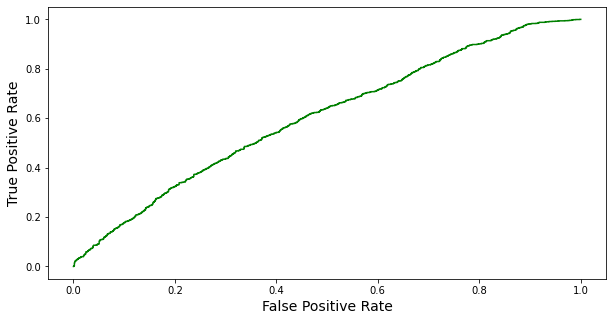

In [189]:
# checking test accuracy using ROC score and curve
from sklearn.metrics import roc_auc_score,balanced_accuracy_score,roc_curve

# roc_auc_score(y_test,grid_model.predict_proba(np.array(x_test)[:,None])[:,1])
# balanced_accuracy_score(y_test,grid_model.predict(np.array(x_test)[:,None]))

fpr, tpr, _ = roc_curve(y_test,logreg_modelC.predict_proba(x_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,c='green')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
# plt.title("ROC score for logreg model is {}".format(roc_auc_score(y_test,y_test[:,1])),fontsize=14)
balanced_accuracy_score(y_test,logreg_modelC.predict(x_test))

In [190]:
# for A
from sklearn.model_selection import train_test_split
x=train_dfA[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']]
y=train_dfA['A or not']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [191]:
#fitting logreg CV model to check coefficients
from sklearn.linear_model import LogisticRegressionCV
logreg_modelA=LogisticRegressionCV(cv=5,Cs=np.linspace(1e-2,1e10,100))
logreg_modelA.fit(x_train,y_train)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.01010101e+08, 2.02020202e+08, 3.03030303e+08,
       4.04040404e+08, 5.05050505e+08, 6.06060606e+08, 7.07070707e+08,
       8.08080808e+08, 9.09090909e+08, 1.01010101e+09, 1.11111111e+09,
       1.21212121e+09, 1.31313131e+09, 1.41414141e+09, 1.51515152e+09,
       1.61616162e+09, 1.71717172e+09, 1.81818182e+09, 1.91919192e+09,
       2.02020202e+09, 2.12...
       7.67676768e+09, 7.77777778e+09, 7.87878788e+09, 7.97979798e+09,
       8.08080808e+09, 8.18181818e+09, 8.28282828e+09, 8.38383838e+09,
       8.48484848e+09, 8.58585859e+09, 8.68686869e+09, 8.78787879e+09,
       8.88888889e+09, 8.98989899e+09, 9.09090909e+09, 9.19191919e+09,
       9.29292929e+09, 9.39393939e+09, 9.49494949e+09, 9.59595960e+09,
       9.69696970e+09, 9.79797980e+09, 9.89898990e+09, 1.00000000e+10]),
                     cv=5)

0.49950787401574803

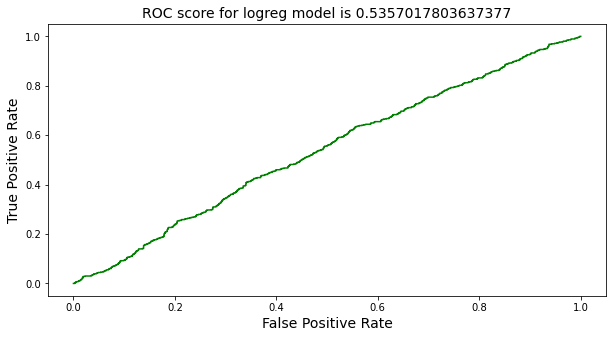

In [192]:
# checking test accuracy using ROC score and curve
from sklearn.metrics import roc_auc_score,balanced_accuracy_score,roc_curve

# roc_auc_score(y_test,grid_model.predict_proba(np.array(x_test)[:,None])[:,1])
# balanced_accuracy_score(y_test,grid_model.predict(np.array(x_test)[:,None]))

fpr, tpr, _ = roc_curve(y_test,logreg_modelA.predict_proba(x_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,c='green')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title("ROC score for logreg model is {}".format(roc_auc_score(y_test,logreg_modelA.predict_proba(x_test)[:,1])),fontsize=14)
balanced_accuracy_score(y_test,logreg_modelA.predict(x_test))

In [193]:
# for B
# for B
from sklearn.model_selection import train_test_split
x=train_dfB[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']]
y=train_dfB['B or not']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [194]:
#fitting logreg CV model to check coefficients
from sklearn.linear_model import LogisticRegressionCV
logreg_modelB=LogisticRegressionCV(cv=5,Cs=np.linspace(1e-2,1e10,100))
logreg_modelB.fit(x_train,y_train)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.01010101e+08, 2.02020202e+08, 3.03030303e+08,
       4.04040404e+08, 5.05050505e+08, 6.06060606e+08, 7.07070707e+08,
       8.08080808e+08, 9.09090909e+08, 1.01010101e+09, 1.11111111e+09,
       1.21212121e+09, 1.31313131e+09, 1.41414141e+09, 1.51515152e+09,
       1.61616162e+09, 1.71717172e+09, 1.81818182e+09, 1.91919192e+09,
       2.02020202e+09, 2.12...
       7.67676768e+09, 7.77777778e+09, 7.87878788e+09, 7.97979798e+09,
       8.08080808e+09, 8.18181818e+09, 8.28282828e+09, 8.38383838e+09,
       8.48484848e+09, 8.58585859e+09, 8.68686869e+09, 8.78787879e+09,
       8.88888889e+09, 8.98989899e+09, 9.09090909e+09, 9.19191919e+09,
       9.29292929e+09, 9.39393939e+09, 9.49494949e+09, 9.59595960e+09,
       9.69696970e+09, 9.79797980e+09, 9.89898990e+09, 1.00000000e+10]),
                     cv=5)

0.5617457126193119

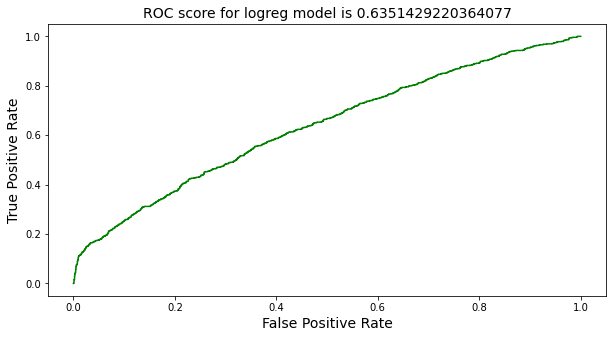

In [195]:
# checking test accuracy using ROC score and curve
from sklearn.metrics import roc_auc_score,balanced_accuracy_score,roc_curve

# roc_auc_score(y_test,grid_model.predict_proba(np.array(x_test)[:,None])[:,1])
# balanced_accuracy_score(y_test,grid_model.predict(np.array(x_test)[:,None]))

fpr, tpr, _ = roc_curve(y_test,logreg_modelB.predict_proba(x_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,c='green')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title("ROC score for logreg model is {}".format(roc_auc_score(y_test,logreg_modelB.predict_proba(x_test)[:,1])),fontsize=14)
balanced_accuracy_score(y_test,logreg_modelB.predict(x_test))

In [196]:
logreg_modelA

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.01010101e+08, 2.02020202e+08, 3.03030303e+08,
       4.04040404e+08, 5.05050505e+08, 6.06060606e+08, 7.07070707e+08,
       8.08080808e+08, 9.09090909e+08, 1.01010101e+09, 1.11111111e+09,
       1.21212121e+09, 1.31313131e+09, 1.41414141e+09, 1.51515152e+09,
       1.61616162e+09, 1.71717172e+09, 1.81818182e+09, 1.91919192e+09,
       2.02020202e+09, 2.12...
       7.67676768e+09, 7.77777778e+09, 7.87878788e+09, 7.97979798e+09,
       8.08080808e+09, 8.18181818e+09, 8.28282828e+09, 8.38383838e+09,
       8.48484848e+09, 8.58585859e+09, 8.68686869e+09, 8.78787879e+09,
       8.88888889e+09, 8.98989899e+09, 9.09090909e+09, 9.19191919e+09,
       9.29292929e+09, 9.39393939e+09, 9.49494949e+09, 9.59595960e+09,
       9.69696970e+09, 9.79797980e+09, 9.89898990e+09, 1.00000000e+10]),
                     cv=5)

In [197]:
test=pd.read_csv('parsed_test.csv')
test=test.drop(index=2977)
# test=test.drop(columns=['Unnamed: 0', 'num_of_artists', 'song_name_length', 'trackSentiment'])
test.columns


Index(['artistName', 'trackName', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'albumName', 'A',
       'B', 'C', 'AnB', 'AnC', 'BnC', 'AnBnC'],
      dtype='object')

In [198]:
[i for i,j in enumerate(test['A']) if str(j)=="nan"]

[]

In [199]:
new_test=test.copy()
test_x=new_test[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']]

In [200]:
# A probs
A_probs=logreg_modelA.predict_proba(test_x)[:,-1]
B_probs=logreg_modelB.predict_proba(test_x)[:,-1]
C_probs=logreg_modelC.predict_proba(test_x)[:,-1]

In [201]:
new_test['A_probs']=A_probs
new_test['B_probs']=B_probs
new_test['C_test']=C_probs

In [137]:
new_test.columns[16:19]

Index(['A', 'B', 'C'], dtype='object')

In [138]:
new_test.columns[17]

'B'

In [139]:
new_test.columns[23:]

Index(['A_probs', 'B_probs', 'C_test'], dtype='object')

In [140]:
np.where(max(new_test.iloc[1,23:]))

(array([0], dtype=int64),)

In [149]:
l=list(new_test.iloc[1,23:])
# l.sort(reverse=True)
# np.allclose(
l

[0.13575475745639629, 0.9234323727405349, 0.11283900721482795]

In [97]:
np.allclose(0.448451,0.495792,rtol=1e-2)

False

In [202]:
for i in range(new_test.shape[0]):
    if np.allclose(A_probs[i],B_probs[i],rtol=1e-1):
        new_test.iloc[i,16]=1
        new_test.iloc[i,16+1]=1
        new_test.iloc[i,19]=1
    elif np.allclose(A_probs[i],C_probs[i],rtol=1e-1):
        new_test.iloc[i,16]=1
        new_test.iloc[i,16+2]=1
        new_test.iloc[i,20]=1
    elif np.allclose(C_probs[i],B_probs[i],rtol=1e-1):
        new_test.iloc[i,16+2]=1
        new_test.iloc[i,16+1]=1
        new_test.iloc[i,21]=1
    else:
        temp_add=list(new_test.iloc[i,23:]).index(max(new_test.iloc[i,23:]))
        new_test.iloc[i,16+temp_add]=1

In [203]:
new_test=new_test.drop(columns=[ 'A_probs', 'B_probs', 'C_test'])

In [204]:
new_test
# new_test = new_test.astype({'A': 'int64', 'B': 'int64', 'C': 'int64', 'AnB': 'int64', 'AnC': 'int64', 'BnC': 'int64', 'AnBnC': 'int64' })
new_test

,artistName,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,albumName,A,B,C,AnB,AnC,BnC,AnBnC
0,Sasha Baron Cohen,Beggars At The Feast,0.487,0.523000,11,-7.713,0,0.0742,0.75200,0.000000,0.1480,0.9650,86.182,29067.0,4.0,Les Misérables: The Motion Picture Soundtrack ...,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,Erik Satie,Uspud Act I (Version for Piano): No. 2 La fume...,0.651,0.000389,7,-42.819,0,0.5200,0.99600,0.973000,0.0620,0.0000,128.230,35640.0,5.0,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Les Misérables Cast,Turning,0.541,0.091800,8,-22.509,1,0.1270,0.95900,0.000054,0.1250,0.4530,113.139,38467.0,3.0,Les Misérables: The Motion Picture Soundtrack ...,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Karmin,Geronimo Intro,0.523,0.336000,2,-7.595,0,0.0558,0.88700,0.000000,0.1110,0.3840,78.242,40548.0,1.0,Pulses,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,Langhorne Slim,Money Road Shuffle,0.381,0.430000,0,-14.825,1,0.0662,0.99400,0.906000,0.1360,0.7130,201.752,45200.0,4.0,Lost At Last Vol. 1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3240,Marillion,Forgotten Sons - Live at the Marquee 30/12/82,0.397,0.580000,2,-11.479,0,0.0789,0.00261,0.002050,0.8110,0.4000,141.815,706747.0,4.0,Early Stages: The Highlights - The Official Bo...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3241,Freddie Hubbard,Red Clay,0.519,0.379000,9,-14.368,1,0.0353,0.40700,0.288000,0.1610,0.5980,139.749,729760.0,4.0,Red Clay,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3242,Pink Floyd,Shine On You Crazy Diamond Pts. 1-5 - 2011 Rem...,0.270,0.214000,7,-15.779,0,0.0290,0.73800,0.661000,0.1170,0.0445,135.869,810293.0,3.0,Wish You Were Here (Remastered Version),0.0,0.0,1.0,0.0,0.0,0.0,0.0
3243,Keilan Creech,On the Shores,0.247,0.654000,2,-9.634,1,0.0369,0.00287,0.000001,0.0785,0.0747,167.282,829195.0,4.0,Moments: Mighty Sound,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [206]:
new_test.to_csv("debraj_mathheads2.csv",encoding='utf-8',index=False)